In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

# https://www.abc.es/ciencia/abci-cual-probabilidad-real-ataque-tiburon-201902272030_noticia.html

In [2]:
csvRoute= "../GSAF5.csv"
df = pd.read_csv(csvRoute, encoding='iso-8859-1')
df.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2016.09.18.c,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,...,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.c-NSB.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.c,2016.09.18.c,5993,NaN,NaN
1,2016.09.18.b,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,Chucky Luciano,M,...,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.b-Luciano.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.b,2016.09.18.b,5992,NaN,NaN
2,2016.09.18.a,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,...,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.a-NSB.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.a,2016.09.18.a,5991,NaN,NaN
3,2016.09.17,17-Sep-16,2016,Unprovoked,AUSTRALIA,Victoria,Thirteenth Beach,Surfing,Rory Angiolella,M,...,NaN,"The Age, 9/18/2016",2016.09.17-Angiolella.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.17,2016.09.17,5990,NaN,NaN
4,2016.09.15,16-Sep-16,2016,Unprovoked,AUSTRALIA,Victoria,Bells Beach,Surfing,male,M,...,2 m shark,"The Age, 9/16/2016",2016.09.16-BellsBeach.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.16,2016.09.15,5989,NaN,NaN


In [3]:
len(df.columns)

24

In [4]:
colsInWeb=['Case Number','Date','Year','Type','Country','Area','Location',
           'Activity','Name','Sex','Age','Injury','Fatal (Y/N)','Time','Species','Investigator or Source']

len(colsInWeb)

16

In [5]:
# Borrar columnas que no necesito
df = df.drop(['pdf', 'href formula', 'href','Case Number.1', 'Case Number.2', 'Unnamed: 22','Unnamed: 23', 'original order'], axis=1)
df_column_list = df.columns.tolist()
len(df_column_list)

16

In [6]:
# Eliminar años no deseados.

df =df[(df['Year']<2016) & (df['Year']>=1960)]

In [7]:
df.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source
103,2015.12.26,26-Dec-15,2015,Boat,SOUTH AFRICA,KwaZulu-Natal,Westbrook Beach,Kayak Fishing,Occupant: Grant Wardell,M,NaN,"No injury, kayak damaged",N,Morning,"White shark, 3 m","Traveller24, 12/26/2015"
104,2015.12.25,25-Dec-15,2015,Unprovoked,SPAIN,Grand Canary Island,"Arinaga Beach, Aguimes, Gran Canaria",Swimming,Cristina Ojeda-Thies,F,38,Lacerations to left forearm,N,NaN,"Silky shark, 6.5'","Diaro de Visos, 12/26/2015"
105,2015.12.22,22-Dec-15,2015,Unprovoked,USA,Hawaii,La'aloa Beach Park,Paddle boarding,Robert Ford,M,71,"No injury, shark bit board",N,Morning,9' shark,"West Hawaii Today, 12/23/2015"
106,2015.12.21.b,21-Dec-15,2015,Unprovoked,AUSTRALIA,New South Wales,Bondi Beach,Surfing,Dean Norburn,M,43,"No injury, shark leapt on surfboard",N,07h00,"Bronze whaler shark, 6'","The Telegraph, 12/22/;2015"
107,2015.12.21.a,21-Dec-15,2015,Unprovoked,BRAZIL,Pernambuco,Fernano de Noronha,Scuba diving,Márcio de Castro Palma,M,32,Right hand & part of forearm removed,N,NaN,"Tiger shark, 1.5 m","Fox News, 12/22/2015"


In [8]:
# En este punto considero que tengo un DF inicial, pero yo voy a eliminar mas columnas ya que he 
# estudiado que no las necesito.

col_descartadas=['Case Number','Type','Name','Sex','Species','Investigator or Source']

# Un error que se puede encontrar son los espacios en el nombre de las columnas.
df_descartado= df[col_descartadas]

KeyError: "['Sex', 'Species'] not in index"

In [9]:
df_column_list = [c.strip() for c in df_column_list]
# df = df.rename(columns= lambda x : x.strip())
df.columns = df_column_list
df_descartado= df[col_descartadas]
df_descartado.head()

,Case Number,Type,Name,Sex,Species,Investigator or Source
103,2015.12.26,Boat,Occupant: Grant Wardell,M,"White shark, 3 m","Traveller24, 12/26/2015"
104,2015.12.25,Unprovoked,Cristina Ojeda-Thies,F,"Silky shark, 6.5'","Diaro de Visos, 12/26/2015"
105,2015.12.22,Unprovoked,Robert Ford,M,9' shark,"West Hawaii Today, 12/23/2015"
106,2015.12.21.b,Unprovoked,Dean Norburn,M,"Bronze whaler shark, 6'","The Telegraph, 12/22/;2015"
107,2015.12.21.a,Unprovoked,Márcio de Castro Palma,M,"Tiger shark, 1.5 m","Fox News, 12/22/2015"


In [10]:
col_estudio = [c for c in df_column_list if c not in df_descartado]
df_estudio= df[col_estudio]
df_estudio.head()

,Date,Year,Country,Area,Location,Activity,Age,Injury,Fatal (Y/N),Time
103,26-Dec-15,2015,SOUTH AFRICA,KwaZulu-Natal,Westbrook Beach,Kayak Fishing,NaN,"No injury, kayak damaged",N,Morning
104,25-Dec-15,2015,SPAIN,Grand Canary Island,"Arinaga Beach, Aguimes, Gran Canaria",Swimming,38,Lacerations to left forearm,N,NaN
105,22-Dec-15,2015,USA,Hawaii,La'aloa Beach Park,Paddle boarding,71,"No injury, shark bit board",N,Morning
106,21-Dec-15,2015,AUSTRALIA,New South Wales,Bondi Beach,Surfing,43,"No injury, shark leapt on surfboard",N,07h00
107,21-Dec-15,2015,BRAZIL,Pernambuco,Fernano de Noronha,Scuba diving,32,Right hand & part of forearm removed,N,NaN


In [11]:
# Renombrar una/s columna:
df_estudio = df_estudio.rename(columns={'Fatal (Y/N)':'Deadly'})
df_estudio.head()

,Date,Year,Country,Area,Location,Activity,Age,Injury,Deadly,Time
103,26-Dec-15,2015,SOUTH AFRICA,KwaZulu-Natal,Westbrook Beach,Kayak Fishing,NaN,"No injury, kayak damaged",N,Morning
104,25-Dec-15,2015,SPAIN,Grand Canary Island,"Arinaga Beach, Aguimes, Gran Canaria",Swimming,38,Lacerations to left forearm,N,NaN
105,22-Dec-15,2015,USA,Hawaii,La'aloa Beach Park,Paddle boarding,71,"No injury, shark bit board",N,Morning
106,21-Dec-15,2015,AUSTRALIA,New South Wales,Bondi Beach,Surfing,43,"No injury, shark leapt on surfboard",N,07h00
107,21-Dec-15,2015,BRAZIL,Pernambuco,Fernano de Noronha,Scuba diving,32,Right hand & part of forearm removed,N,NaN


In [12]:
# Reordenar columnas:
col_est_orden= ['Date','Year','Time','Country','Area','Location', 'Injury','Deadly', 'Age', 'Activity']
df_est_orden= df_estudio[col_est_orden]
df_est_orden.head()

,Date,Year,Time,Country,Area,Location,Injury,Deadly,Age,Activity
103,26-Dec-15,2015,Morning,SOUTH AFRICA,KwaZulu-Natal,Westbrook Beach,"No injury, kayak damaged",N,NaN,Kayak Fishing
104,25-Dec-15,2015,NaN,SPAIN,Grand Canary Island,"Arinaga Beach, Aguimes, Gran Canaria",Lacerations to left forearm,N,38,Swimming
105,22-Dec-15,2015,Morning,USA,Hawaii,La'aloa Beach Park,"No injury, shark bit board",N,71,Paddle boarding
106,21-Dec-15,2015,07h00,AUSTRALIA,New South Wales,Bondi Beach,"No injury, shark leapt on surfboard",N,43,Surfing
107,21-Dec-15,2015,NaN,BRAZIL,Pernambuco,Fernano de Noronha,Right hand & part of forearm removed,N,32,Scuba diving


In [13]:
df_est_orden.shape

(3705, 10)

In [14]:
df_est_orden.dtypes

Date        object
Year         int64
Time        object
Country     object
Area        object
Location    object
Injury      object
Deadly      object
Age         object
Activity    object
dtype: object

In [15]:
# Tratamiento de valores Nulos
col_w_nulls= df_est_orden.isnull()
col_w_nulls.sum().sort_values(ascending=False)

Time        1483
Age         1132
Activity     256
Location     222
Area         176
Injury        14
Country       11
Deadly         4
Year           0
Date           0
dtype: int64

In [16]:
# Rellenar los na con 'NoData'
df_est_orden['Age']=df_est_orden['Age'].fillna('NoData')

In [17]:
# Age no me cuadra que sea objeto, quiero int o float. Voy a analizarlo.
df_est_orden['Age'].value_counts()

NoData                     1132
17                          104
20                          104
16                          102
19                          101
15                           97
18                           94
24                           92
21                           87
22                           84
25                           80
14                           73
29                           62
26                           62
28                           62
27                           62
13                           60
30                           57
32                           57
23                           55
35                           53
12                           48
10                           43
31                           42
40                           38
34                           36
33                           35
43                           35
36                           33
37                           33
                           ... 
25 or 28

In [18]:
# Veo que hay valores alfa no deseados, voy a tratarlos.
# Cleaning, removing

def solo_numeros(valor):
    pat= '[^0-9]*'
    numero= re.sub(pat,"",valor)
    if len(numero)>2: numero= numero[:2]
    return numero

# A apply se le envía la funcion, directamente. apply ya envía el valor uno por uno.
# Es como decir, aplica cambios con esta función.
dFrame= df_est_orden
dFrame['Age'] = dFrame['Age'].apply(solo_numeros)
dFrame

,Date,Year,Time,Country,Area,Location,Injury,Deadly,Age,Activity
103,26-Dec-15,2015,Morning,SOUTH AFRICA,KwaZulu-Natal,Westbrook Beach,"No injury, kayak damaged",N,,Kayak Fishing
104,25-Dec-15,2015,NaN,SPAIN,Grand Canary Island,"Arinaga Beach, Aguimes, Gran Canaria",Lacerations to left forearm,N,38,Swimming
105,22-Dec-15,2015,Morning,USA,Hawaii,La'aloa Beach Park,"No injury, shark bit board",N,71,Paddle boarding
106,21-Dec-15,2015,07h00,AUSTRALIA,New South Wales,Bondi Beach,"No injury, shark leapt on surfboard",N,43,Surfing
107,21-Dec-15,2015,NaN,BRAZIL,Pernambuco,Fernano de Noronha,Right hand & part of forearm removed,N,32,Scuba diving
108,19-Dec-15,2015,NaN,ARUBA,NaN,Boat capsized,FATAL,Y,58,Sea disaster
109,13-Dec-15,2015,10h30,AUSTRALIA,New South Wales,Lake Macquarie,"No injury, shark rammed boat & bit motor",N,,Fishing
110,11-Dec-15,2015,NaN,BAHAMAS,NaN,Off Andros Island,"Bitten on thigh, abdomen & hand",N,26,Lobster fishing
111,08-Dec-15,2015,Morning,SOUTH AFRICA,Eastern Cape Province,Mpande,Lacerations to both hands and forearms,N,22,Swimming / Wading
112,16-Nov-15,2015,Afternoon,USA,Florida,"Playalinda Beach, Brevard County",Right heel injured,N,,Surfing


In [19]:
#Cambiar valores especificos, Filtering
dFrame.loc[(dFrame['Age']==""), 'Age']=0

#Cambiar tipo
dFrame['Age']=dFrame['Age'].astype('int64')
dFrame

,Date,Year,Time,Country,Area,Location,Injury,Deadly,Age,Activity
103,26-Dec-15,2015,Morning,SOUTH AFRICA,KwaZulu-Natal,Westbrook Beach,"No injury, kayak damaged",N,0,Kayak Fishing
104,25-Dec-15,2015,NaN,SPAIN,Grand Canary Island,"Arinaga Beach, Aguimes, Gran Canaria",Lacerations to left forearm,N,38,Swimming
105,22-Dec-15,2015,Morning,USA,Hawaii,La'aloa Beach Park,"No injury, shark bit board",N,71,Paddle boarding
106,21-Dec-15,2015,07h00,AUSTRALIA,New South Wales,Bondi Beach,"No injury, shark leapt on surfboard",N,43,Surfing
107,21-Dec-15,2015,NaN,BRAZIL,Pernambuco,Fernano de Noronha,Right hand & part of forearm removed,N,32,Scuba diving
108,19-Dec-15,2015,NaN,ARUBA,NaN,Boat capsized,FATAL,Y,58,Sea disaster
109,13-Dec-15,2015,10h30,AUSTRALIA,New South Wales,Lake Macquarie,"No injury, shark rammed boat & bit motor",N,0,Fishing
110,11-Dec-15,2015,NaN,BAHAMAS,NaN,Off Andros Island,"Bitten on thigh, abdomen & hand",N,26,Lobster fishing
111,08-Dec-15,2015,Morning,SOUTH AFRICA,Eastern Cape Province,Mpande,Lacerations to both hands and forearms,N,22,Swimming / Wading
112,16-Nov-15,2015,Afternoon,USA,Florida,"Playalinda Beach, Brevard County",Right heel injured,N,0,Surfing


In [21]:
media = round(dFrame['Age'][(dFrame['Age']>0)].mean())
media

28

In [22]:
dFrame.loc[(dFrame['Age']==0), 'Age']=media
dFrame.head()

,Date,Year,Time,Country,Area,Location,Injury,Deadly,Age,Activity
103,26-Dec-15,2015,Morning,SOUTH AFRICA,KwaZulu-Natal,Westbrook Beach,"No injury, kayak damaged",N,28,Kayak Fishing
104,25-Dec-15,2015,NaN,SPAIN,Grand Canary Island,"Arinaga Beach, Aguimes, Gran Canaria",Lacerations to left forearm,N,38,Swimming
105,22-Dec-15,2015,Morning,USA,Hawaii,La'aloa Beach Park,"No injury, shark bit board",N,71,Paddle boarding
106,21-Dec-15,2015,07h00,AUSTRALIA,New South Wales,Bondi Beach,"No injury, shark leapt on surfboard",N,43,Surfing
107,21-Dec-15,2015,NaN,BRAZIL,Pernambuco,Fernano de Noronha,Right hand & part of forearm removed,N,32,Scuba diving


In [23]:
dFrame.describe()

,Year,Age
count,3705.000000,3705.000000
mean,1992.865587,27.959514
std,17.462510,11.596295
min,1960.000000,1.000000
25%,1979.000000,20.000000
50%,1998.000000,28.000000
75%,2008.000000,30.000000
max,2015.000000,91.000000


In [24]:
top3countries = dFrame['Country'].value_counts().head(3)
top3countries

USA             1614
AUSTRALIA        625
SOUTH AFRICA     415
Name: Country, dtype: int64

In [31]:
# Sin el reset index da fallo el grafico
countries = top3countries.reset_index()
countries.columns = ['Pais', 'Ataques']
countries

,Pais,Ataques
0,USA,1614
1,AUSTRALIA,625
2,SOUTH AFRICA,415


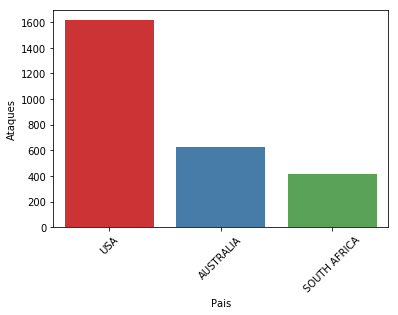

In [32]:
sns.barplot(countries.Pais, countries.Ataques, palette="Set1")
plt.xticks(rotation=45)
plt.show()

In [38]:
Years_values = dFrame['Year'].value_counts().sort_index()
Years_values[1960]

93

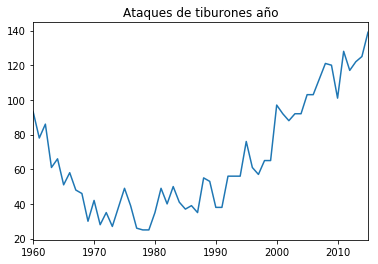

In [35]:
# Investigar .plot de matplotlib
Years_values.plot(title="Ataques de tiburones año")

In [ ]:
# La barra es el cambio de linea
df[df['Fatal (Y/N)'].isin(['Y','N'])]["Fatal (Y/N)"].value_counts()\
.plot(kind='bar', title= "Was the attack fatal?",legend = True, color= ['green','red'])